In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def func(x):
    return np.exp(-x*x)

def df_exact(x):
    return -2 * x * np.exp(-x*x)

In [35]:
N = 100
h = 2 / N
x = np.arange(-1, 1, h)

In [36]:
def fd_central(f, z, h):
    return ( f(z+h) - f(z-h) ) / (2*h)

def fd_bwd(f, z, h):
    return ( f(z) - f(z-h) ) / h

def fd_fwd(f, z, h):
    return( f(z+h) - f(z) ) / h

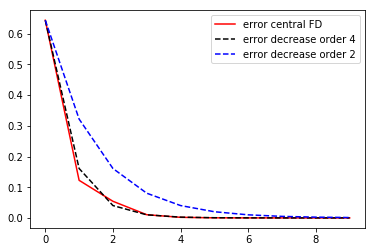

In [37]:
N = 1 # initial N
k = 10
error_list = np.zeros(k)
N_list     = np.zeros(k)
decrease_order4 = np.zeros(k)
decrease_order2 = np.zeros(k)


for i in range(k):
    h = 2 / N
    x = np.arange(-1, 1, h)
    D_exact = [df_exact(z) for z in x]
    D_num = [fd_central(func, z, h) for z in x]
    error_list[i] = np.sqrt(sum([(D_exact[j] - D_num[j])**2 for j in range(N)])) / N
    if (i>0):
        decrease_order4[i] = decrease_order4[i-1] / 4
        decrease_order2[i] = decrease_order2[i-1] / 2

    else:
        decrease_order4[0] = error_list[0]
        decrease_order2[0] = error_list[0]


    N_list[i] = N
    N = N*2 # iteratively double N in each loop
    


plt.plot(np.log2(N_list), error_list, color="red")
plt.plot(np.log2(N_list), decrease_order4, "--", color="black")
plt.plot(np.log2(N_list), decrease_order2, "--", color="blue")

plt.legend(["error central FD", "error decrease order 4", "error decrease order 2"])
None

Ecentral = error_list

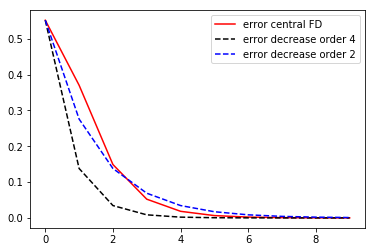

In [41]:
N = 1 # initial N
k = 10
error_list = np.zeros(k)
N_list     = np.zeros(k)
for i in range(k):
    h = 2 / N
    x = np.arange(-1, 1, h)
    D_exact = [df_exact(z) for z in x]
    D_num = [fd_bwd(func, z, h) for z in x]
    error_list[i] = np.sqrt(sum([(D_exact[j] - D_num[j])**2 for j in range(N)])) / N

    if (i>0):
        decrease_order4[i] = decrease_order4[i-1] / 4
        decrease_order2[i] = decrease_order2[i-1] / 2

    else:
        decrease_order4[0] = error_list[0]
        decrease_order2[0] = error_list[0]
        
    N_list[i] = N
    N = N*2 # iteratively double N in each loop

plt.plot(np.log2(N_list), error_list, color="red")
plt.plot(np.log2(N_list), decrease_order4, "--", color="black")
plt.plot(np.log2(N_list), decrease_order2, "--", color="blue")

plt.legend(["error central FD", "error decrease order 4", "error decrease order 2"])
None
Ebwd = error_list

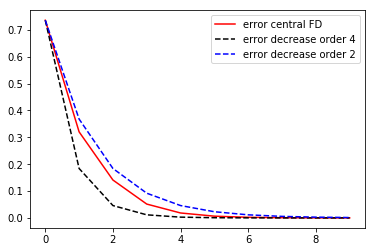

In [42]:
N = 1 # initial N
k = 10
error_list = np.zeros(k)
N_list     = np.zeros(k)
for i in range(k):
    h = 2 / N
    x = np.arange(-1, 1, h)
    D_exact = [df_exact(z) for z in x]
    D_num = [fd_fwd(func, z, h) for z in x]
    error_list[i] = np.sqrt(sum([(D_exact[j] - D_num[j])**2 for j in range(N)])) / N
    
    if (i>0):
        decrease_order4[i] = decrease_order4[i-1] / 4
        decrease_order2[i] = decrease_order2[i-1] / 2

    else:
        decrease_order4[0] = error_list[0]
        decrease_order2[0] = error_list[0]
        
    N_list[i] = N
    N = N*2 # iteratively double N in each loop

plt.plot(np.log2(N_list), error_list, color="red")
plt.plot(np.log2(N_list), decrease_order4, "--", color="black")
plt.plot(np.log2(N_list), decrease_order2, "--", color="blue")

plt.legend(["error central FD", "error decrease order 4", "error decrease order 2"])
None

Efwd = error_list

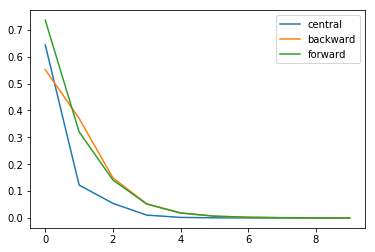

In [43]:
plt.plot(np.log2(N_list), Ecentral)
plt.plot(np.log2(N_list), Ebwd)
plt.plot(np.log2(N_list), Efwd)
labels = ['central', 'backward', 'forward']
plt.legend(labels)